# Hierarchical Clustering Using Scipy
In this notebook, we will be using Scipy to make dendrograms. The notebook gives the basic steps to realise a dendrogram from a numeric matrix. Let’s describe a few customisations that you can easily apply to your dendrogram based on the car dataset which contains different attributes like model, mpg, gear and other features related to cars.

## 1. Making a simple Dendrogram

### Importing libraries


In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np

### Importing Data Set

In [13]:
df = pd.read_csv('mtcars.csv')

In [14]:
df = df.set_index('model')

**Agglomerative Clustering** has different types like *WARD*,  *COMPLETE-LINK* and *AVERAGE*, however in this notebook we shall be using *WARD* clustering in this example. 

In [15]:
#Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')

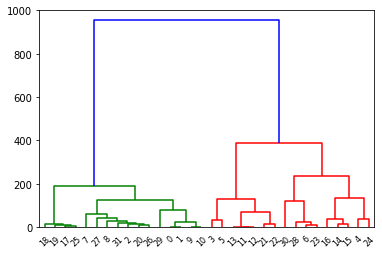

In [16]:
hierarchy.dendrogram(Z, leaf_font_size=8)
plt.show()

**Note: The figure above shows a simple dendrogram without proper labels shown. Let us explore further and see how customizations can be made to improve the plot.**

## 2. Adding leaf labels

In [17]:
df = df.rename_axis(None)

In [18]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
Z = hierarchy.linkage(df, 'ward')

**Now we shall make a dendrogram for improving the leaf rotation and font size of labels using the following parameters:**

- leaf_rotation = 90
- leaf_font_size= 10
- labels=df.index

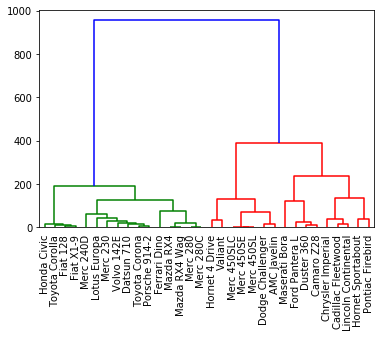

In [20]:
#Plot with Custom leaves
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=10, labels=df.index)
plt.show()

**Note: The above plot shows labels and names of different models, those which are adjusted to get a better understanding of the dendrogram. We can further improve the visualization by changing the orientation of these labels.**

## 3. Orientation

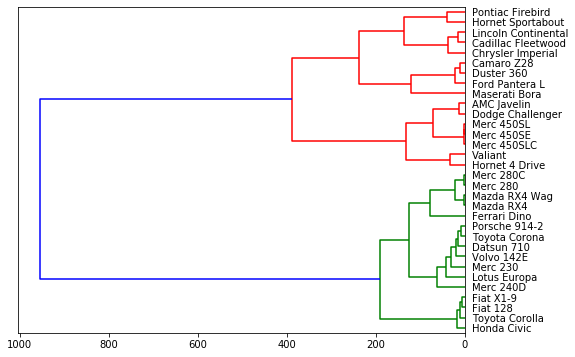

In [21]:
#Changing Orientation of the dendrogram to 'left' and using font_size=10
plt.figure(figsize=(8,6))
hierarchy.dendrogram(Z, orientation='left', leaf_font_size=10, labels=df.index)
plt.show()

## 4. Number of clusters

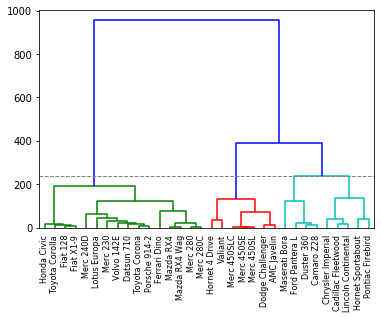

In [22]:
#Control number of clusters in the plot and also add an horizontal line.
hierarchy.dendrogram(Z, color_threshold=240,labels=df.index,leaf_rotation=90)
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

**Note: A horizontal line shows the threshold from where the clusters can be identified. Currently there are 3 clusters shown. Changing the threshold would result in a different number of clusters.**

# Hierarchical Clustering using SKLearn

We have a csv file that contains all the votes from the 114th Senate.  Each row contains the votes of an individual senator. Votes are coded as 0 for “No”, 1 for “Yes”, and 0.5 for “Abstain”. There are different columns having the bills, the party, and the state of each senator. Lets see how clustering will be applied on this data set.

## 1. Clustering
Let's now use sklearn's ```AgglomerativeClustering``` to conduct the hierarchical clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
data=pd.read_csv('114_congress.csv')
df_senate= data.copy()

In [46]:
#Checking shape of dataset
df_senate.shape

(100, 18)

In [47]:
#Display first five rows
df_senate.head()

,name,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [48]:
#Checking data types
df_senate.dtypes

name        object
party       object
state       object
Bill_1     float64
Bill_4     float64
Bill_5     float64
Bill_6     float64
Bill_7     float64
Bill_8     float64
Bill_9     float64
Bill_10    float64
Bill_20    float64
Bill_26    float64
Bill_32    float64
Bill_38    float64
Bill_39    float64
Bill_44    float64
Bill_47    float64
dtype: object

In [49]:
df_senate.set_index('name',inplace=True)

In [50]:
df_senate.head()

,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,,,
Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [51]:
X=df_senate.drop(['party','state'], axis = 1)

In [52]:
X.head()

,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,
Alexander,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
Y=df_senate['party']

In [54]:
Y.head()

name
Alexander    R
Ayotte       R
Baldwin      D
Barrasso     R
Bennet       D
Name: party, dtype: object

### Hierarchical Clustering

In [34]:
#Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)

### Let's also try 'complete' and 'average' linkages

In [35]:
#Hierarchical clustering using complete linkage
#Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
#Fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(X)



#Hierarchical clustering using average linkage
#Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
#Fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(X)

**Note: To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).**

In [36]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(Y, ward_pred)

In [37]:
#Calculate the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(Y, complete_pred)

#Calculate the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(Y, avg_pred)

In [38]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8110199642721615 
Complete:  0.8944016485750291 
Average:  0.8944016485750291


In [40]:
complete_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [41]:
print(pd.crosstab(complete_pred, df_senate["party"]))

party   D  I   R
row_0           
0       1  0  54
1      41  2   0
2       2  0   0


## 3. Dendrogram visualization with scipy

Let's visualize the highest scoring clustering result. 

To do that, we'll need to use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clustering again so we can obtain the linkage matrix it will later use to visualize the hierarchy

**Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values. Pick the one that resulted in the highest Adjusted Rand Score**

In [55]:
#Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

#Specifying linkage type
linkage_type = 'complete' 

linkage_matrix = linkage(X, linkage_type)

**Now, plot a dendogram using scipy's [dendrogram()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function with the following parameters:**

- leaf_font_size=10
- labels=X.index
- orientation="right"
- figsize=(15,18)

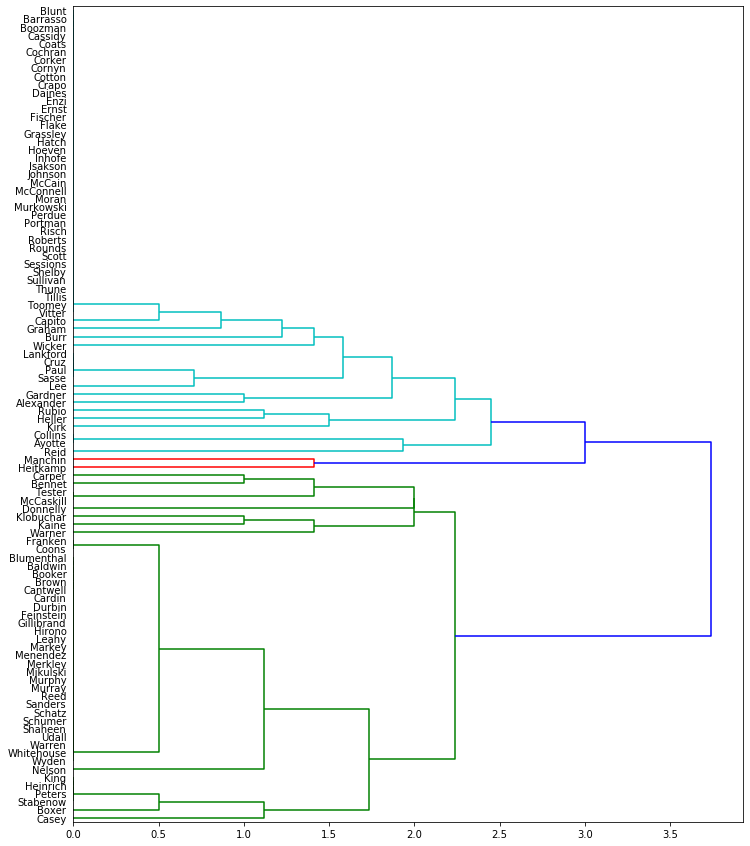

In [43]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12,15))

dendrogram(linkage_matrix, leaf_font_size=10, labels=X.index, orientation='right')
plt.show()

## 4. Visualization with Seaborn's ```clustermap``` 

The [seaborn](http://seaborn.pydata.org/index.html) plotting library for python can plot a [clustermap](http://seaborn.pydata.org/generated/seaborn.clustermap.html), which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

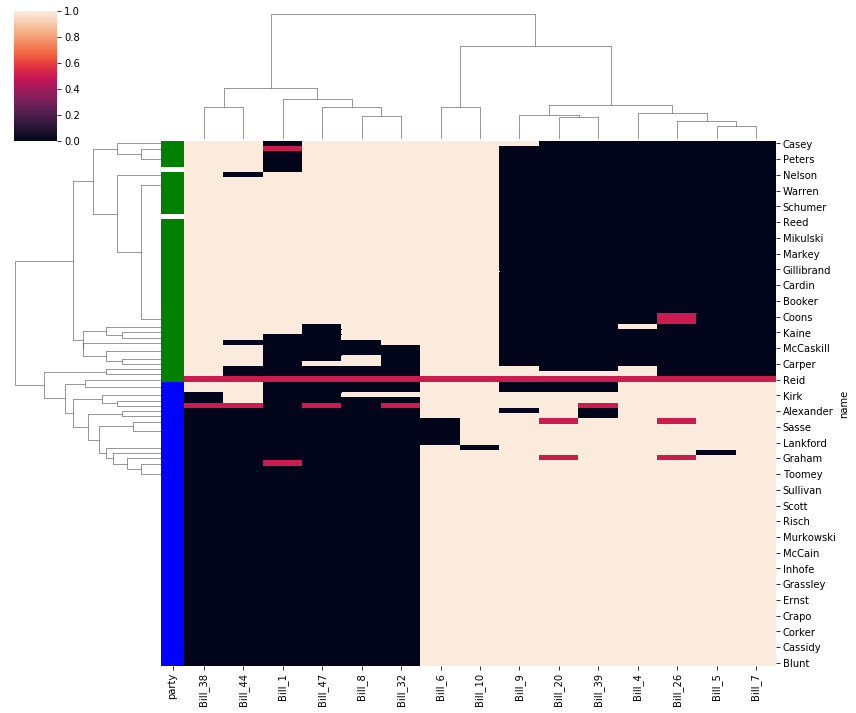

In [43]:
import seaborn as sns
lut = dict(zip(Y, "rbg"))
row_colors = Y.map(lut)
sns.clustermap(X, row_colors=row_colors, figsize=(12,10),method='complete')
plt.show()

**Note: Looking at the colors of the dimensions can you observe how they different senators have voted. The bar on the extreme left shows the party they belong to. The plot on the whole shows which of the senators have voted, which have not and which of them have abstained.**